# References

Scikit-learn documentation: https://scikit-learn.org/stable/supervised_learning.html A powerful ML library, used to generate data, pre-process it, and train a variety of linear models.

# Necessary Imports

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Linear Regression Example

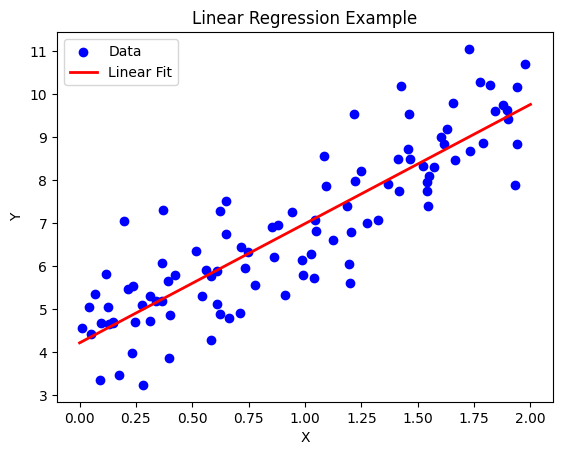

In [80]:
# Generate synthetic linear data
np.random.seed(42)
X_linear = 2 * np.random.rand(100, 1)
y_linear = 4 + 3 * X_linear + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Fit Linear Regression Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_linear, y_linear)

# Predictions
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = linear_regressor.predict(X_new)

# Plot
plt.scatter(X_linear, y_linear, color="blue", label="Data")
plt.plot(X_new, y_pred, color="red", linewidth=2, label="Linear Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Example")
plt.legend()
plt.show()

# Logistic Regression Example

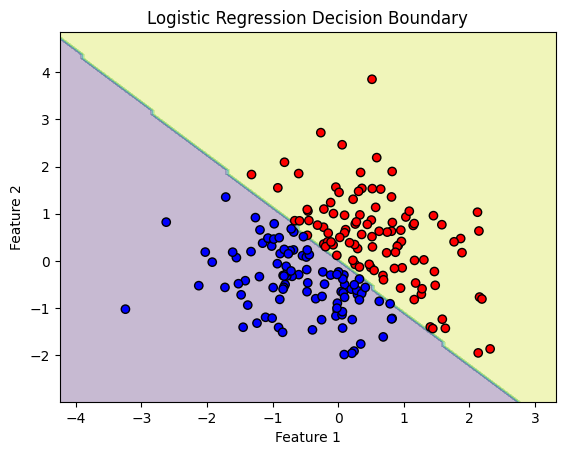

In [81]:
# Generate synthetic classification data
np.random.seed(42)
X_logistic = np.random.randn(200, 2)
y_logistic = (X_logistic[:, 0] + X_logistic[:, 1] > 0).astype(int)  # Decision boundary: x + y > 0

# Fit Logistic Regression Model
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_logistic, y_logistic)

# Create a mesh grid for visualization
x_min, x_max = X_logistic[:, 0].min() - 1, X_logistic[:, 0].max() + 1
y_min, y_max = X_logistic[:, 1].min() - 1, X_logistic[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = logistic_regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_logistic[:, 0], X_logistic[:, 1], c=y_logistic, edgecolors="k", cmap="bwr")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()


# Non-Linear Data Handling

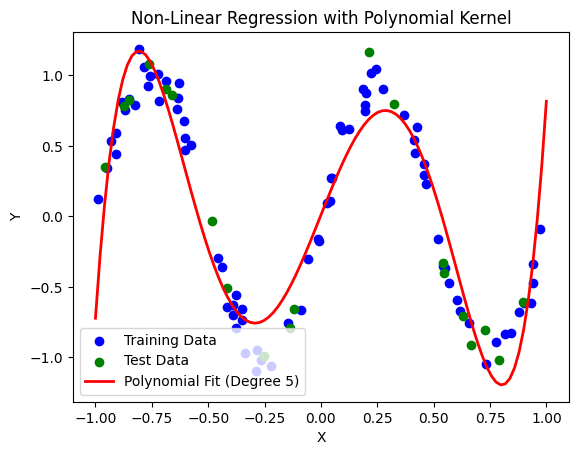

Mean Squared Error: 0.0571


In [82]:
# Generate non-linear data
np.random.seed(42)
X_nl = 2 * np.random.rand(100, 1) - 1  # X in range [-1, 1]
y_nl = np.sin(2 * np.pi * X_nl).ravel() + 0.1 * np.random.randn(100)  # y = sin(2πx) + noise

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_nl, y_nl, test_size=0.2, random_state=42)

# Fit a polynomial regression model
degree = 5  # Kernel transform (polynomial of degree 5)
poly_regressor = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_regressor.fit(X_train, y_train)

# Predictions
X_plot = np.linspace(-1, 1, 100).reshape(100, 1)
y_poly_pred = poly_regressor.predict(X_plot)

# Plot
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.plot(X_plot, y_poly_pred, color="red", linewidth=2, label=f"Polynomial Fit (Degree {degree})")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-Linear Regression with Polynomial Kernel")
plt.legend()
plt.show()

# Evaluate model performance
mse = mean_squared_error(y_test, poly_regressor.predict(X_test))
print(f"Mean Squared Error: {mse:.4f}")


# Bonus: Support Vector Regression

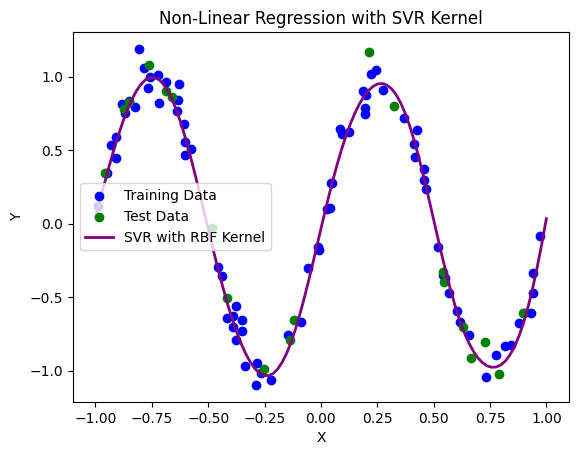

SVR Mean Squared Error: 0.0090


In [83]:
# Support Vector Regression with RBF kernel
svr_regressor = SVR(kernel="rbf", C=100, gamma=10)  # RBF kernel transformation
svr_regressor.fit(X_train, y_train)

# Predictions
y_svr_pred = svr_regressor.predict(X_plot)

# Plot
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.plot(X_plot, y_svr_pred, color="purple", linewidth=2, label="SVR with RBF Kernel")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-Linear Regression with SVR Kernel")
plt.legend()
plt.show()

# Evaluate model performance
mse_svr = mean_squared_error(y_test, svr_regressor.predict(X_test))
print(f"SVR Mean Squared Error: {mse_svr:.4f}")


# Una Pregunta Dificil...

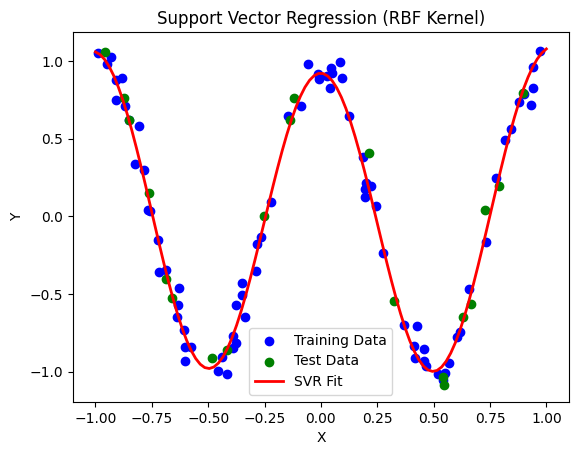

Mean Squared Error: 0.0074


In [107]:
# Generate non-linear data
np.random.seed(42)
X_nl = 2 * np.random.rand(100, 1) - 1  # X in range [-1, 1]
y_nl = np.cos(2 * np.pi * X_nl).ravel() + 0.1 * np.random.randn(100)  # y = cos(2πx) + noise

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_nl, y_nl, test_size=0.2, random_state=42)
model = make_pipeline(
    StandardScaler(),     # Feature scaling is crucial for SVR
    SVR(kernel='rbf', C=100, epsilon=0.0005)
)


# Fit the model to the training data
model.fit(X_train, y_train)

# comparing mse between training data and test data to check for overfitting over various c values

# for C_value in [0.1, 1, 10, 50, 100]:
#     model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=C_value, epsilon=0.0001))
    
#     # Train the model
#     model.fit(X_train, y_train)

#     # Predictions
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)

#     # Evaluate performance
#     train_mse = mean_squared_error(y_train, y_train_pred)
#     test_mse = mean_squared_error(y_test, y_test_pred)
#     train_r2 = r2_score(y_train, y_train_pred)
#     test_r2 = r2_score(y_test, y_test_pred)

#     print(f"\nC = {C_value}")
#     print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
#     print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")


# Generate predictions
X_plot = np.linspace(-1, 1, 100).reshape(100, 1)
y_pred = model.predict(X_plot)

# Plot the results
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.plot(X_plot, y_pred, color="red", linewidth=2, label="SVR Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Support Vector Regression (RBF Kernel)")
plt.legend(loc="lower center")
plt.show()

# Evaluate model performance
mse = mean_squared_error(y_test, model.predict(X_test))
print(f"Mean Squared Error: {mse:.4f}")

# Decision Trees

## Dataset:
| Cap Color | Stalk Shape | Solitary | Edible |
|-----------|-------------|----------|--------|
| Brown     | Tapering    | Yes      | 1      |
| Brown     | Enlarging   | Yes      | 1      |
| Brown     | Enlarging   | No       | 0      |
| Brown     | Enlarging   | No       | 0      |
| Brown     | Tapering    | Yes      | 1      |
| Red       | Tapering    | Yes      | 0      |
| Red       | Enlarging   | No       | 0      |
| Brown     | Enlarging   | Yes      | 1      |
| Red       | Tapering    | No       | 1      |
| Brown     | Enlarging   | No       | 0      |


## Encoded:

| Cap Color | Stalk Shape | Solitary | Edible |
|-----------|-------------|----------|--------|
| 1     | 1    | 1      | 1      |
| 1     | 0   | 1      | 1      |
| 1     | 0   | 0       | 0      |
| 1     | 0   | 0       | 0      |
| 1     | 1    | 1      | 1      |
| 0       | 1    | 1      | 0      |
| 0       | 0   | 0       | 0      |
| 1     | 0   | 1      | 1      |
| 0       | 1    | 0       | 1      |
| 1     | 0   | 0       | 0      |

In [85]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Training data
X_train = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [1, 0, 0],
    [1, 0, 0],
    [1, 1, 1],
    [1, 0, 0]
])
y_train = np.array([1, 1, 0, 0, 1, 0])

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

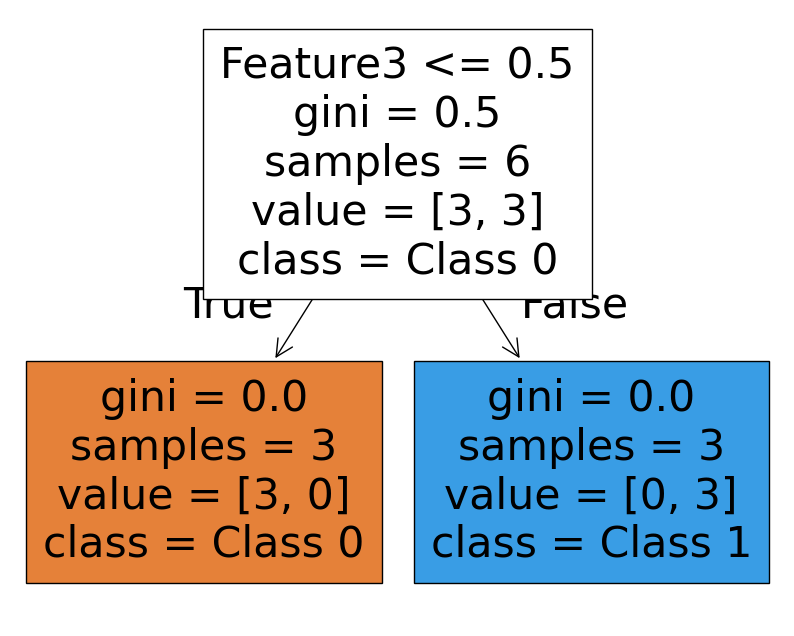

In [86]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=['Feature1', 'Feature2', 'Feature3'],
          class_names=['Class 0', 'Class 1'], filled=True)
plt.show()

In [87]:
# Testing data
X_test = np.array([[0, 0, 0]])
prediction = clf.predict(X_test)

print(f"Prediction for {X_test}:", prediction[0])

Prediction for [[0 0 0]]: 0


# Task for Decision trees

In [88]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the dataset
wine = load_wine()

# Convert to DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [89]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [90]:
# Split into training and testing sets
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=123)

In [91]:
from sklearn.metrics import accuracy_score

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.9800
